### Set Up

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt


### Importing Data

In [2]:
cwd = os.getcwd()
cwd

'/home/benthompson/code/bendthompson/london_fires/notebooks'

In [3]:
xl21 = pd.ExcelFile("../raw_data/Fire Facts - Incident response times 2021.xlsx")


In [4]:
xl20 = pd.ExcelFile("../raw_data/Fire Facts - Incident response times 2020.xlsx")
xl19 = pd.ExcelFile("../raw_data/Fire Facts - Incident Response Times 2019.xlsx")
xl18 = pd.ExcelFile("../raw_data/Fire Facts - Incident Response Times 2018.xlsx")
xl17 = pd.ExcelFile("../raw_data/Fire Facts - Incident Response Times 2017.xlsx")

In [5]:
sheetnames21 = xl21.sheet_names

In [6]:

sheetnames20 = xl20.sheet_names
sheetnames19 = xl19.sheet_names
sheetnames18 = xl18.sheet_names
sheetnames17 = xl17.sheet_names


In [7]:
sheetnames21

['Sheet6',
 'Sheet7',
 'About',
 '2',
 '3',
 '3.1 to 3.5',
 '4.1',
 '5.1',
 '5.2',
 '5.3',
 '5.4',
 '5.5',
 '5.6',
 '5.7',
 '5.8',
 '5.9',
 '5.10',
 '6.1',
 'chart 1',
 'chart 2']

In [46]:
df = xl21.parse('6.1')

### Cleaning Data

In [44]:
df.columns = df.columns.str[:-2]

In [51]:
df.head()

2,area,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,London total,1900-01-01 00:07:14.205000,1900-01-01 00:07:06.301000,1900-01-01 00:07:02.120000,1900-01-01 00:06:57.896000,1900-01-01 00:07:09.374000,1900-01-01 00:07:15.070000,1900-01-01 00:07:06.652000,1900-01-01 00:06:54.372000,1900-01-01 00:06:52.990000,1900-01-01 00:06:53.169000,1900-01-01 00:06:43.534000,1900-01-01 00:06:48.714000
1,Inner London,1900-01-01 00:06:38.541000,1900-01-01 00:06:33.822000,1900-01-01 00:06:29.222000,1900-01-01 00:06:26.809000,1900-01-01 00:06:47.579000,1900-01-01 00:06:52.227000,1900-01-01 00:06:43.427000,1900-01-01 00:06:33.181000,1900-01-01 00:06:30.601000,1900-01-01 00:06:31.108000,1900-01-01 00:06:20.735000,1900-01-01 00:06:27.523000
2,Camden,1900-01-01 00:06:26.800000,1900-01-01 00:06:20.553000,1900-01-01 00:06:16.613000,1900-01-01 00:06:07.051000,1900-01-01 00:06:31.514000,1900-01-01 00:06:46.210000,1900-01-01 00:06:40.867000,1900-01-01 00:06:31.719000,1900-01-01 00:06:30.591000,1900-01-01 00:06:32.332000,1900-01-01 00:06:21.974000,1900-01-01 00:06:32.036000
3,City of London,1900-01-01 00:06:27.581000,1900-01-01 00:06:31.662000,1900-01-01 00:06:30.154000,1900-01-01 00:06:17.540000,1900-01-01 00:06:39.363000,1900-01-01 00:06:50.889000,1900-01-01 00:06:40.187000,1900-01-01 00:06:27.462000,1900-01-01 00:06:32.363000,1900-01-01 00:06:28.531000,1900-01-01 00:06:16.579000,1900-01-01 00:06:03.582000
4,Hackney,1900-01-01 00:06:46.169000,1900-01-01 00:06:29.648000,1900-01-01 00:06:30.958000,1900-01-01 00:06:24.150000,1900-01-01 00:06:45.608000,1900-01-01 00:06:50.773000,1900-01-01 00:06:39.020000,1900-01-01 00:06:34.390000,1900-01-01 00:06:30.702000,1900-01-01 00:06:33.534000,1900-01-01 00:06:27.608000,1900-01-01 00:06:35.609000


In [48]:
df.columns = (df.iloc[2,:]) #promote row with labels to labels

In [49]:
df.drop(index=[0,1,2], inplace=True)  #remove empty rows

In [50]:
df.rename(columns=str, inplace=True)
df.columns = df.columns.str[:-2]
df.rename(columns={'n':'area'}, inplace=True) #rename NaN col label to Area
df.reset_index(drop=True, inplace=True) #

In [13]:
df['area'] = df['area'].str.lower() #make all area names lowercase to be consistent

In [14]:
totalsdf = df[df['area'].isin(['london total', 'inner london', 'outer london'])] #collect the total rows in a df

In [15]:
totalsdf

2,area,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
0,london total,1900-01-01 00:07:14.205000,1900-01-01 00:07:06.301000,1900-01-01 00:07:02.120000,1900-01-01 00:06:57.896000,1900-01-01 00:07:09.374000,1900-01-01 00:07:15.070000,1900-01-01 00:07:06.652000,1900-01-01 00:06:54.372000,1900-01-01 00:06:52.990000,1900-01-01 00:06:53.169000,1900-01-01 00:06:43.534000,1900-01-01 00:06:48.714000
1,inner london,1900-01-01 00:06:38.541000,1900-01-01 00:06:33.822000,1900-01-01 00:06:29.222000,1900-01-01 00:06:26.809000,1900-01-01 00:06:47.579000,1900-01-01 00:06:52.227000,1900-01-01 00:06:43.427000,1900-01-01 00:06:33.181000,1900-01-01 00:06:30.601000,1900-01-01 00:06:31.108000,1900-01-01 00:06:20.735000,1900-01-01 00:06:27.523000
16,outer london,1900-01-01 00:07:54.852000,1900-01-01 00:07:42.377000,1900-01-01 00:07:38.081000,1900-01-01 00:07:31.772000,1900-01-01 00:07:33.295000,1900-01-01 00:07:39.952000,1900-01-01 00:07:31.223000,1900-01-01 00:07:16.661000,1900-01-01 00:07:16.471000,1900-01-01 00:07:16.718000,1900-01-01 00:07:06.954000,1900-01-01 00:07:11.194000


In [16]:
df.drop(df.index[df['area'].isin(['london total', 'inner london', 'outer london'])], inplace=True) #remove total rows
df.reset_index(drop=True, inplace=True)
df.set_index('area', drop=True, inplace=True)

In [17]:
df

2,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
area,,,,,,,,,,,,
camden,1900-01-01 00:06:26.800000,1900-01-01 00:06:20.553000,1900-01-01 00:06:16.613000,1900-01-01 00:06:07.051000,1900-01-01 00:06:31.514000,1900-01-01 00:06:46.210000,1900-01-01 00:06:40.867000,1900-01-01 00:06:31.719000,1900-01-01 00:06:30.591000,1900-01-01 00:06:32.332000,1900-01-01 00:06:21.974000,1900-01-01 00:06:32.036000
city of london,1900-01-01 00:06:27.581000,1900-01-01 00:06:31.662000,1900-01-01 00:06:30.154000,1900-01-01 00:06:17.540000,1900-01-01 00:06:39.363000,1900-01-01 00:06:50.889000,1900-01-01 00:06:40.187000,1900-01-01 00:06:27.462000,1900-01-01 00:06:32.363000,1900-01-01 00:06:28.531000,1900-01-01 00:06:16.579000,1900-01-01 00:06:03.582000
hackney,1900-01-01 00:06:46.169000,1900-01-01 00:06:29.648000,1900-01-01 00:06:30.958000,1900-01-01 00:06:24.150000,1900-01-01 00:06:45.608000,1900-01-01 00:06:50.773000,1900-01-01 00:06:39.020000,1900-01-01 00:06:34.390000,1900-01-01 00:06:30.702000,1900-01-01 00:06:33.534000,1900-01-01 00:06:27.608000,1900-01-01 00:06:35.609000
hammersmith and fulham,1900-01-01 00:07:00.143000,1900-01-01 00:06:52.843000,1900-01-01 00:06:42.646000,1900-01-01 00:06:26.249000,1900-01-01 00:06:37.866000,1900-01-01 00:06:39.678000,1900-01-01 00:06:43.434000,1900-01-01 00:06:26.067000,1900-01-01 00:06:25.676000,1900-01-01 00:06:29.536000,1900-01-01 00:06:20.153000,1900-01-01 00:06:23.307000
haringey,1900-01-01 00:07:33.370000,1900-01-01 00:07:26.860000,1900-01-01 00:07:17.172000,1900-01-01 00:07:13.717000,1900-01-01 00:07:15.546000,1900-01-01 00:07:17.588000,1900-01-01 00:06:37.885000,1900-01-01 00:07:05.180000,1900-01-01 00:06:55.524000,1900-01-01 00:07:08.145000,1900-01-01 00:06:50.129000,1900-01-01 00:06:57.614000
islington,1900-01-01 00:06:29.698000,1900-01-01 00:06:24.842000,1900-01-01 00:06:22.454000,1900-01-01 00:06:17.438000,1900-01-01 00:06:37.575000,1900-01-01 00:06:43.609000,1900-01-01 00:06:33.666000,1900-01-01 00:06:22.526000,1900-01-01 00:06:12.985000,1900-01-01 00:06:12.400000,1900-01-01 00:06:09.327000,1900-01-01 00:06:29.453000
kensington and chelsea,1900-01-01 00:06:13.486000,1900-01-01 00:06:07.583000,1900-01-01 00:06:06.907000,1900-01-01 00:06:05.382000,1900-01-01 00:06:16.824000,1900-01-01 00:06:18.629000,1900-01-01 00:06:10.865000,1900-01-01 00:06:00.941000,1900-01-01 00:06:04.076000,1900-01-01 00:06:04.906000,1900-01-01 00:05:51.521000,1900-01-01 00:05:54.803000
lambeth,1900-01-01 00:06:21.886000,1900-01-01 00:06:18.212000,1900-01-01 00:06:13.127000,1900-01-01 00:06:17.260000,1900-01-01 00:06:20.611000,1900-01-01 00:06:31.371000,1900-01-01 00:06:28.302000,1900-01-01 00:06:18.529000,1900-01-01 00:06:20.959000,1900-01-01 00:06:12.533000,1900-01-01 00:06:07.023000,1900-01-01 00:06:09.659000
lewisham,1900-01-01 00:06:31.500000,1900-01-01 00:06:30.801000,1900-01-01 00:06:20.282000,1900-01-01 00:06:26.853000,1900-01-01 00:06:49.471000,1900-01-01 00:06:54.447000,1900-01-01 00:06:43.184000,1900-01-01 00:06:28.455000,1900-01-01 00:06:28.983000,1900-01-01 00:06:17.972000,1900-01-01 00:06:26.297000,1900-01-01 00:06:31.086000


In [18]:
def timetosecs(time):
    return round(time.hour + time.minute*60 + time.second + time.microsecond/1000000)
def timetominsecs(time):
    t = round(time.hour + time.minute*60 + time.second + time.microsecond/1000000)
    return t//60, t%60

In [19]:
df = df.applymap(timetosecs)

In [20]:
df['mean'] = df.mean(axis=1).round(2)

In [21]:
df

2,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,mean
area,,,,,,,,,,,,,
camden,387,381,377,367,392,406,401,392,391,392,382,392,388.33
city of london,388,392,390,378,399,411,400,387,392,389,377,364,388.92
hackney,406,390,391,384,406,411,399,394,391,394,388,396,395.83
hammersmith and fulham,420,413,403,386,398,400,403,386,386,390,380,383,395.67
haringey,453,447,437,434,436,438,398,425,416,428,410,418,428.33
islington,390,385,382,377,398,404,394,383,373,372,369,389,384.67
kensington and chelsea,373,368,367,365,377,379,371,361,364,365,352,355,366.42
lambeth,382,378,373,377,381,391,388,379,381,373,367,370,378.33
lewisham,392,391,380,387,409,414,403,388,389,378,386,391,392.33


In [22]:
yearly_means = [df[yr].mean().round(2) for yr in df][:-1] #ignore means col

In [23]:
yearly_means

[442.91,
 433.55,
 428.82,
 424.06,
 433.27,
 439.24,
 429.94,
 416.88,
 416.15,
 416.55,
 407.33,
 412.3]

<BarContainer object of 12 artists>

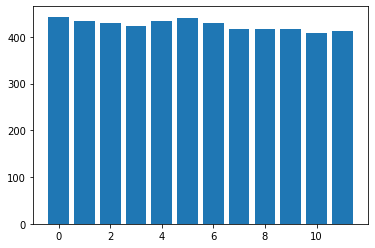

In [24]:
plt.bar(x=range(len(yearly_means)), height=yearly_means)

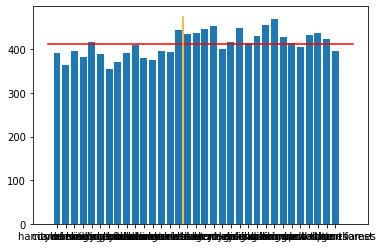

In [25]:
plt.bar(x=df.index, height=df['2021.0'])
plt.plot([-1,34], [412.3,412.3], c='red')
plt.plot([14.5,14.5],[0,475], c='orange')
#2021 times compared to mean


In [26]:
innerdf = df[0:14]
innerdf

2,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,mean
area,,,,,,,,,,,,,
camden,387,381,377,367,392,406,401,392,391,392,382,392,388.33
city of london,388,392,390,378,399,411,400,387,392,389,377,364,388.92
hackney,406,390,391,384,406,411,399,394,391,394,388,396,395.83
hammersmith and fulham,420,413,403,386,398,400,403,386,386,390,380,383,395.67
haringey,453,447,437,434,436,438,398,425,416,428,410,418,428.33
islington,390,385,382,377,398,404,394,383,373,372,369,389,384.67
kensington and chelsea,373,368,367,365,377,379,371,361,364,365,352,355,366.42
lambeth,382,378,373,377,381,391,388,379,381,373,367,370,378.33
lewisham,392,391,380,387,409,414,403,388,389,378,386,391,392.33


In [27]:
inner_yearly_means = [innerdf[yr].mean().round(2) for yr in df][:-1]

<BarContainer object of 12 artists>

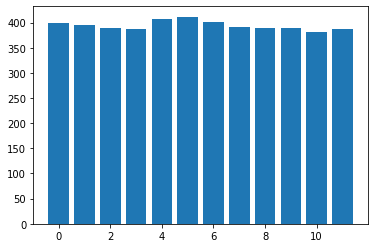

In [28]:
plt.bar(x=range(len(inner_yearly_means)), height=inner_yearly_means)

In [29]:
outerdf = df[14:]

In [30]:
outer_yearly_means = [outerdf[yr].mean().round(2) for yr in df][:-1]

<BarContainer object of 12 artists>

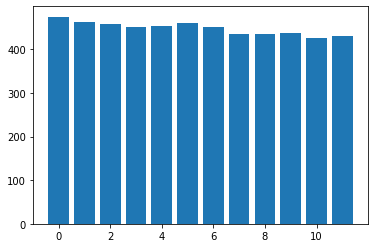

In [31]:
plt.bar(x=range(len(outer_yearly_means)), height=outer_yearly_means)

In [32]:
np.array(inner_yearly_means) - np.array(outer_yearly_means)

array([-75.03, -66.45, -67.67, -63.87, -45.39, -48.06, -49.27, -43.21,
       -45.79, -46.47, -46.48, -44.69])

<BarContainer object of 12 artists>

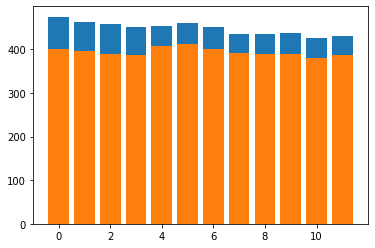

In [33]:
plt.bar(x=range(len(outer_yearly_means)), height=outer_yearly_means)
plt.bar(x=range(len(inner_yearly_means)), height=inner_yearly_means) #inner london is consistently faster than outer

In [34]:
innerdf.iloc[:,:-1]

2,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
area,,,,,,,,,,,,
camden,387,381,377,367,392,406,401,392,391,392,382,392
city of london,388,392,390,378,399,411,400,387,392,389,377,364
hackney,406,390,391,384,406,411,399,394,391,394,388,396
hammersmith and fulham,420,413,403,386,398,400,403,386,386,390,380,383
haringey,453,447,437,434,436,438,398,425,416,428,410,418
islington,390,385,382,377,398,404,394,383,373,372,369,389
kensington and chelsea,373,368,367,365,377,379,371,361,364,365,352,355
lambeth,382,378,373,377,381,391,388,379,381,373,367,370
lewisham,392,391,380,387,409,414,403,388,389,378,386,391


In [35]:
innerdiffs = innerdf.iloc[:,:-1] - inner_yearly_means #each areas difference from the mean

In [36]:
innerdf['difffrommean'] = innerdiffs.sum(axis=1)

/tmp/ipykernel_20015/2922046792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  innerdf['difffrommean'] = innerdiffs.sum(axis=1)


In [37]:
innerdf

2,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,mean,difffrommean
area,,,,,,,,,,,,,,
camden,387,381,377,367,392,406,401,392,391,392,382,392,388.33,-71.15
city of london,388,392,390,378,399,411,400,387,392,389,377,364,388.92,-64.15
hackney,406,390,391,384,406,411,399,394,391,394,388,396,395.83,18.85
hammersmith and fulham,420,413,403,386,398,400,403,386,386,390,380,383,395.67,16.85
haringey,453,447,437,434,436,438,398,425,416,428,410,418,428.33,408.85
islington,390,385,382,377,398,404,394,383,373,372,369,389,384.67,-115.15
kensington and chelsea,373,368,367,365,377,379,371,361,364,365,352,355,366.42,-334.15
lambeth,382,378,373,377,381,391,388,379,381,373,367,370,378.33,-191.15
lewisham,392,391,380,387,409,414,403,388,389,378,386,391,392.33,-23.15


In [38]:
outerdiffs = outerdf.iloc[:,:-1] - outer_yearly_means #each areas difference from the mean

In [39]:
outerdf['difffrommean'] = outerdiffs.sum(axis=1)

/tmp/ipykernel_20015/1428105052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outerdf['difffrommean'] = outerdiffs.sum(axis=1)


In [40]:
outerdf

2,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,mean,difffrommean
area,,,,,,,,,,,,,,
barking and dagenham,462,443,446,441,457,513,443,434,451,440,438,444,451.00,38.47
barnet,505,484,484,474,463,467,456,449,447,442,426,436,461.08,159.47
bexley,466,454,445,446,452,467,461,440,437,450,440,438,449.67,22.47
brent,469,455,467,450,456,462,451,448,436,444,433,446,451.42,43.47
bromley,493,489,485,482,477,472,468,457,466,454,453,453,470.75,275.47
croydon,444,442,438,434,428,435,430,411,415,412,404,402,424.58,-278.53
ealing,460,437,428,427,430,441,437,431,422,421,410,416,430.00,-213.53
enfield,504,495,487,478,478,478,471,470,461,463,441,448,472.83,300.47
greenwich,433,430,420,408,431,430,435,420,419,424,413,414,423.08,-296.53


In [41]:
ii = np.array(innerdf.sort_values('2021.0')['2021.0'])
jj = np.array(outerdf.sort_values('2021.0')['2021.0'])

In [42]:
ii

array([355, 364, 370, 375, 380, 383, 389, 391, 392, 393, 396, 396, 410,
       418])

In [43]:
jj

array([397, 402, 405, 414, 414, 416, 424, 429, 431, 433, 436, 437, 438,
       444, 446, 448, 453, 457, 470])

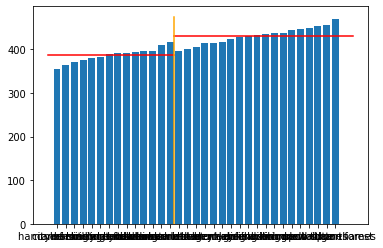

In [44]:
plt.bar(x=df.index, height=np.concatenate((ii,jj)))
plt.plot([-1,13.5], [ii.mean(),ii.mean()], c='red')
plt.plot([13.5,34], [jj.mean(),jj.mean()], c='red')
plt.plot([13.5,13.5],[0,475], c='orange')
#2021 times compared to mean

In [45]:
np.concatenate((ii,jj))

array([355, 364, 370, 375, 380, 383, 389, 391, 392, 393, 396, 396, 410,
       418, 397, 402, 405, 414, 414, 416, 424, 429, 431, 433, 436, 437,
       438, 444, 446, 448, 453, 457, 470])

In [46]:
df.head()

2,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,mean
area,,,,,,,,,,,,,
camden,387,381,377,367,392,406,401,392,391,392,382,392,388.33
city of london,388,392,390,378,399,411,400,387,392,389,377,364,388.92
hackney,406,390,391,384,406,411,399,394,391,394,388,396,395.83
hammersmith and fulham,420,413,403,386,398,400,403,386,386,390,380,383,395.67
haringey,453,447,437,434,436,438,398,425,416,428,410,418,428.33


<AxesSubplot:xlabel='area'>

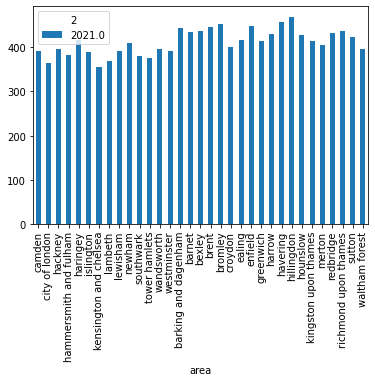

In [47]:
df[['2021.0']].plot(kind='bar')

<AxesSubplot:xlabel='area'>

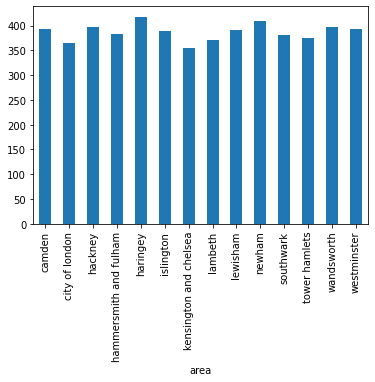

In [48]:
innerdf['2021.0'].plot(kind='bar')

<AxesSubplot:xlabel='area'>

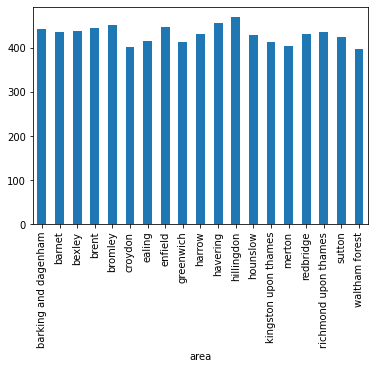

In [49]:
outerdf['2021.0'].plot(kind='bar')

In [50]:
import plotly.express as px

In [53]:
import geopandas as gpd

In [54]:
geojson = gpd.read_file('../raw_data/london_boroughs.json')

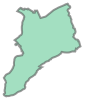

In [55]:
geojson['geometry'][0]

In [56]:
df.shape

(33, 13)

In [57]:
geojson.shape

(33, 6)

In [58]:
df.head()

2,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,mean
area,,,,,,,,,,,,,
camden,387,381,377,367,392,406,401,392,391,392,382,392,388.33
city of london,388,392,390,378,399,411,400,387,392,389,377,364,388.92
hackney,406,390,391,384,406,411,399,394,391,394,388,396,395.83
hammersmith and fulham,420,413,403,386,398,400,403,386,386,390,380,383,395.67
haringey,453,447,437,434,436,438,398,425,416,428,410,418,428.33


In [59]:
geojson['name'] = geojson['name'].str.lower()

In [60]:
merge_df = df[['mean']].merge(geojson, right_on='name',left_on='area')

In [61]:
merge_df.head()

,mean,id,name,code,area_hectares,inner_statistical,geometry
0,388.33,26,camden,E09000007,2178.932,True,"MULTIPOLYGON (((-0.14242 51.56912, -0.14250 51..."
1,388.92,33,city of london,E09000001,314.942,True,"MULTIPOLYGON (((-0.11157 51.51075, -0.11159 51..."
2,395.83,29,hackney,E09000012,1904.902,True,"MULTIPOLYGON (((-0.09766 51.57365, -0.09756 51..."
3,395.67,23,hammersmith and fulham,E09000013,1715.409,True,"MULTIPOLYGON (((-0.24456 51.48870, -0.24460 51..."
4,428.33,30,haringey,E09000014,2959.837,True,"MULTIPOLYGON (((-0.09766 51.57365, -0.09780 51..."


In [110]:
merge_df['coords'] = merge_df.geometry.apply(lambda x: x.representative_point().coords[:][0])

In [111]:
merge_df

,mean,id,name,code,area_hectares,inner_statistical,geometry,coords
0,388.33,26,camden,E09000007,2178.932,True,"MULTIPOLYGON (((-0.14242 51.56912, -0.14250 51...","(-0.1625039141125169, 51.54282702817975)"
1,388.92,33,city of london,E09000001,314.942,True,"MULTIPOLYGON (((-0.11157 51.51075, -0.11159 51...","(-0.09360311229207938, 51.51557704901175)"
2,395.83,29,hackney,E09000012,1904.902,True,"MULTIPOLYGON (((-0.09766 51.57365, -0.09756 51...","(-0.04766674837702632, 51.548812259979044)"
3,395.67,23,hammersmith and fulham,E09000013,1715.409,True,"MULTIPOLYGON (((-0.24456 51.48870, -0.24460 51...","(-0.23084385323050718, 51.4987092317037)"
4,428.33,30,haringey,E09000014,2959.837,True,"MULTIPOLYGON (((-0.09766 51.57365, -0.09780 51...","(-0.1054100596040824, 51.587929820827696)"
5,384.67,28,islington,E09000019,1485.664,True,"MULTIPOLYGON (((-0.13839 51.55686, -0.13852 51...","(-0.10169366396616325, 51.54715629908195)"
6,366.42,24,kensington and chelsea,E09000020,1238.379,True,"MULTIPOLYGON (((-0.18388 51.47742, -0.18403 51...","(-0.20082849730808067, 51.50383515782215)"
7,378.33,11,lambeth,E09000022,2724.940,True,"MULTIPOLYGON (((-0.12846 51.48505, -0.12843 51...","(-0.12167604682489634, 51.45979924301275)"
8,392.33,13,lewisham,E09000023,3531.706,True,"MULTIPOLYGON (((-0.03241 51.49306, -0.03240 51...","(-0.01251054258426166, 51.453431601553305)"
9,416.58,31,newham,E09000025,3857.806,True,"MULTIPOLYGON (((-0.00786 51.52301, -0.00811 51...","(0.02780821410043185, 51.531166439651)"


<AxesSubplot:>

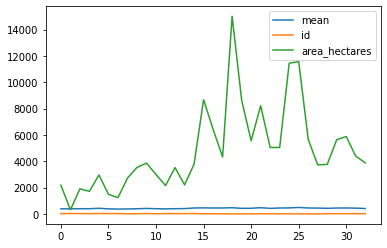

In [120]:
merge_df.plot()

In [113]:
merge_geodf = gpd.GeoDataFrame(merge_df, geometry='geometry')

<AxesSubplot:>

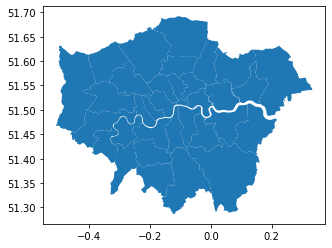

In [114]:
merge_geodf.plot()

In [115]:
innerldn_merge = merge_geodf[0:14]
outerldn_merge = merge_geodf[14:]

In [136]:
geojson
geojson['coords'] = geojson.geometry.apply(lambda x: x.representative_point().coords[:][0])

In [134]:
merged_df = geojson.merge(df[['mean']], right_on='area', left_on='name')

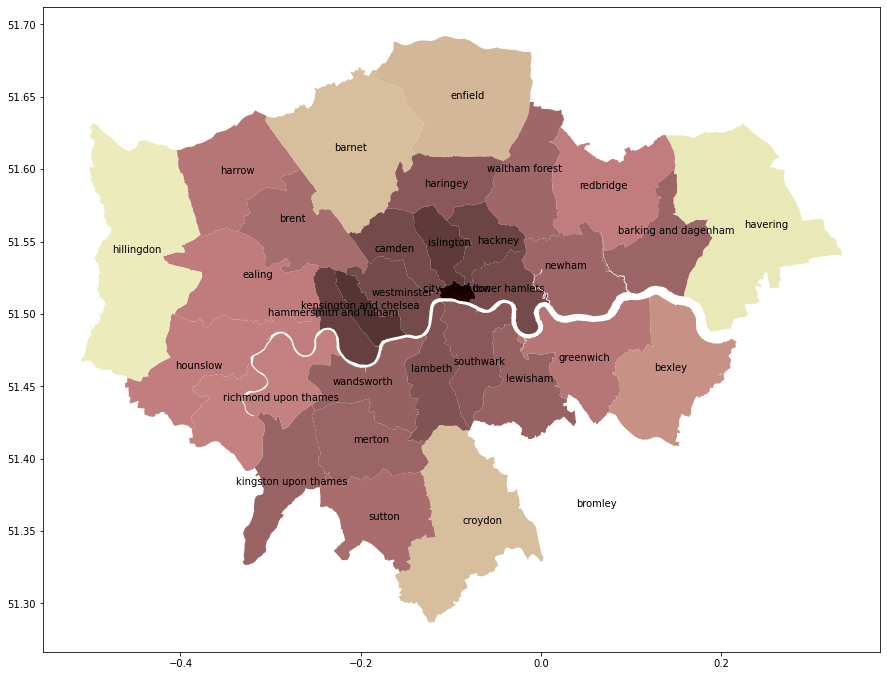

In [140]:
f, ax = plt.subplots(1, figsize=(15, 15))
ax = geojson.plot(column='area_hectares', cmap='pink' ,ax=ax)
for idx, row in geojson.iterrows():
    plt.annotate(text=row['name'], xy=row['coords'],
                 horizontalalignment='center')
plt.show()

In [70]:
import mapclassify

In [128]:
merged_df.head()

,id,name,code,area_hectares,inner_statistical,geometry,mean
0,1,kingston upon thames,E09000021,3726.117,False,"MULTIPOLYGON (((-0.33068 51.32901, -0.33059 51...",444.75
1,2,croydon,E09000008,8649.441,False,"MULTIPOLYGON (((-0.06402 51.31864, -0.06408 51...",424.58
2,3,bromley,E09000006,15013.487,False,"MULTIPOLYGON (((0.01213 51.29960, 0.01196 51.2...",470.75
3,4,hounslow,E09000018,5658.541,False,"MULTIPOLYGON (((-0.24456 51.48870, -0.24468 51...",450.92
4,5,ealing,E09000009,5554.428,False,"MULTIPOLYGON (((-0.41183 51.53408, -0.41188 51...",430.00


In [183]:
merged_df.shape

(33, 8)

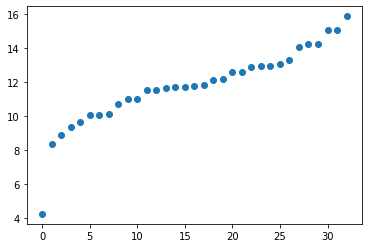

In [219]:
plt.scatter(x=range(33), y=merged_df.area_hectares.sort_values().apply(lambda x : (math.log(x)*3)-13))

In [144]:
merged_df['coords'] = merged_df.geometry.apply(lambda x: x.representative_point().coords[:][0])

In [159]:
import math

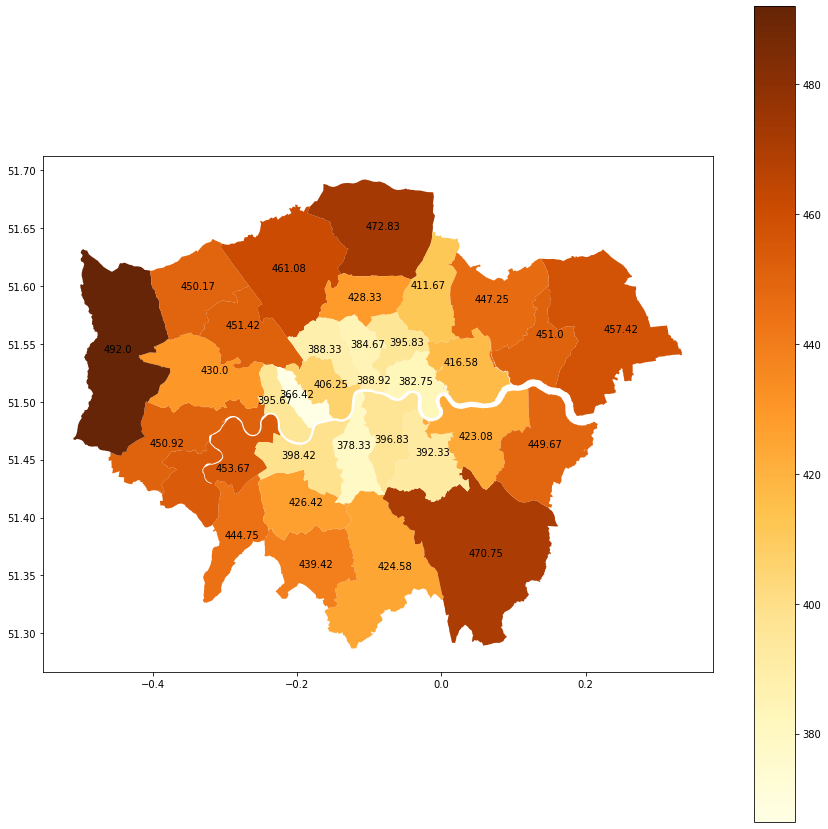

In [224]:
f, ax = plt.subplots(1, figsize=(15, 15))
ax = merged_df.plot(column='mean', cmap='YlOrBr' ,ax=ax,  
         legend=True)
for idx, row in merged_df.iterrows():
    plt.annotate(text=row['mean'], xy=row['coords'],
                 horizontalalignment='center', color='black', fontsize=10)
plt.show()

In [77]:
minmean,maxmean = merged_df['mean'].min(), merged_df['mean'].max()

In [78]:
np.linspace(minmean,maxmean,8)

array([366.42, 384.36, 402.3 , 420.24, 438.18, 456.12, 474.06, 492.  ])

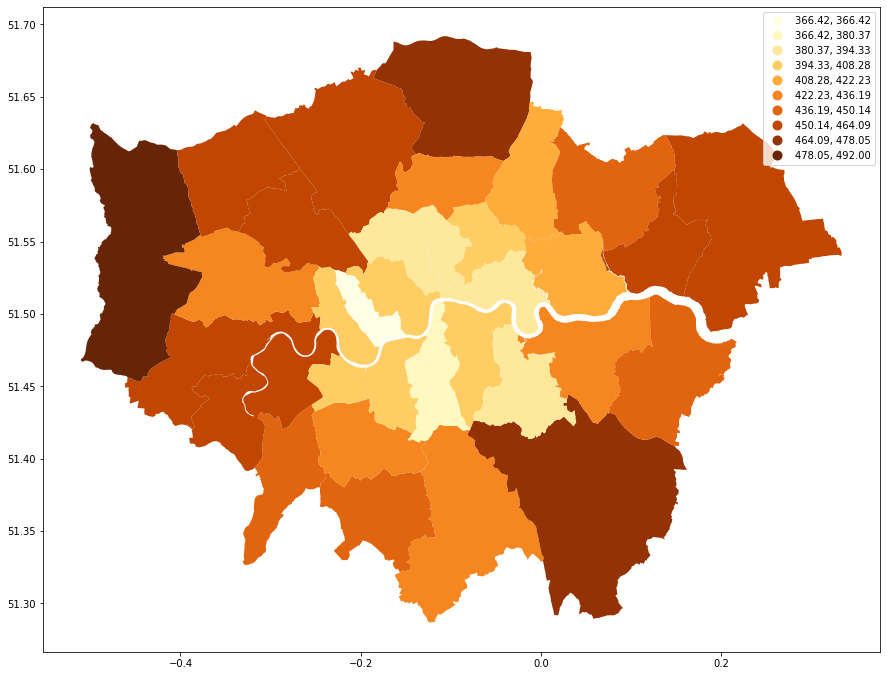

In [79]:
f, ax = plt.subplots(1, figsize=(15, 15))
ax = merged_df.plot(column='mean', cmap='YlOrBr' ,ax=ax, scheme="User_Defined", 
         legend=True, classification_kwds=dict(bins=np.linspace(minmean,maxmean,10)))

plt.show()

In [80]:
type(merged_df)

geopandas.geodataframe.GeoDataFrame

In [81]:
type(outerldn_merge)

geopandas.geodataframe.GeoDataFrame

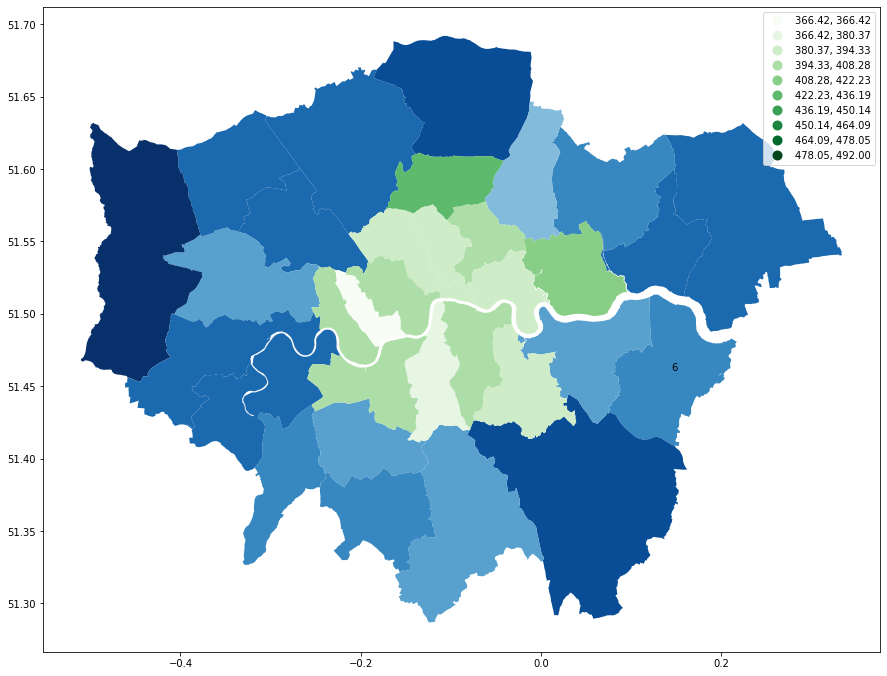

In [112]:
f, ax = plt.subplots(1, figsize=(15, 15))
ax = outerldn_merge.plot(column='mean', cmap='Blues' ,ax=ax, scheme="User_Defined", 
         legend=True, classification_kwds=dict(bins=np.linspace(minmean,maxmean,10)))
ax = innerldn_merge.plot(column='mean', cmap='Greens' ,ax=ax, scheme="User_Defined", 
         legend=True, classification_kwds=dict(bins=np.linspace(minmean,maxmean,10)))
plt.annotate(6, xy=coords)
plt.show()

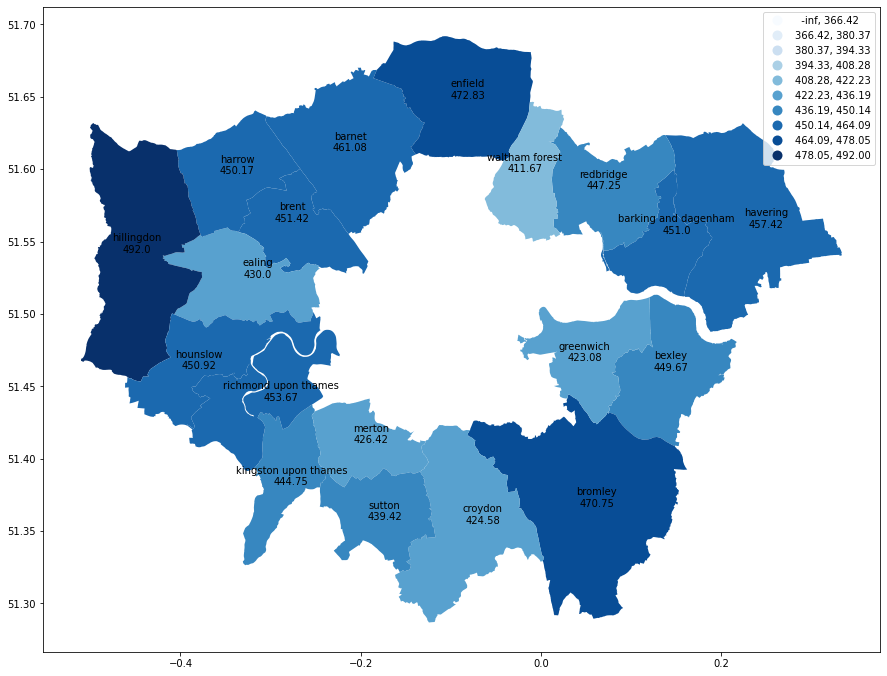

In [237]:
f, ax = plt.subplots(1, figsize=(15, 15))
ax = outerldn_merge.plot(column='mean', cmap='Blues' ,ax=ax, scheme="User_Defined", 
         legend=True, classification_kwds=dict(bins=np.linspace(minmean,maxmean,10)))
for idx, row in outerldn_merge.iterrows():
    plt.annotate(text=row['name']+'\n'+str(row['mean']), xy=row['coords'],
                 horizontalalignment='center')
plt.show()

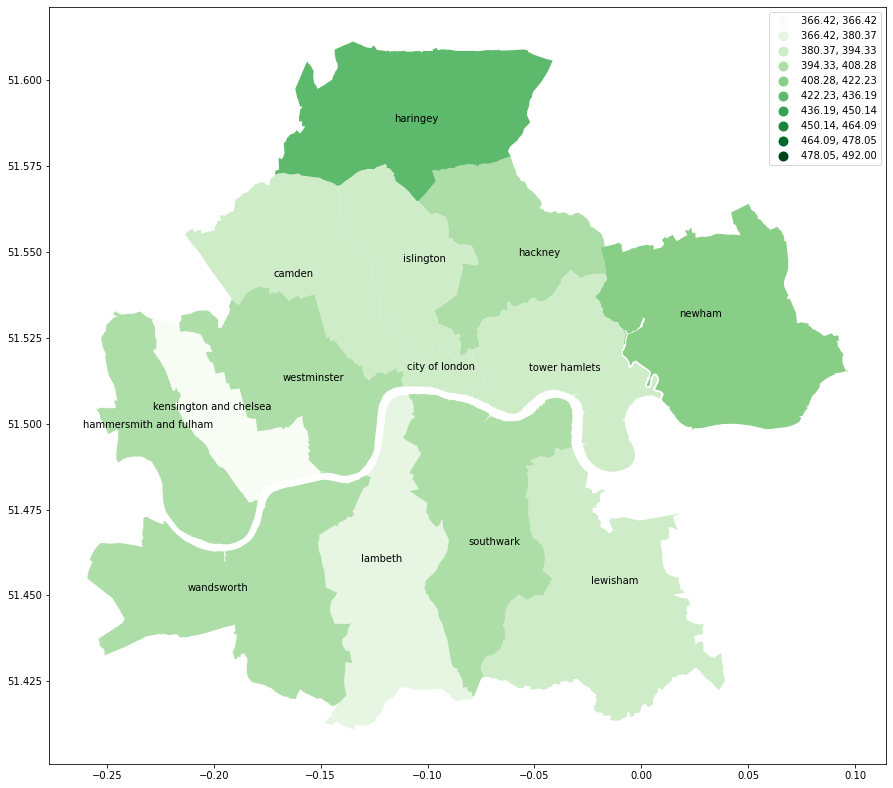

In [228]:
f, ax = plt.subplots(1, figsize=(15, 15))
ax = innerldn_merge.plot(column='mean', cmap='Greens' ,ax=ax, scheme="User_Defined", 
         legend=True, classification_kwds=dict(bins=np.linspace(minmean,maxmean,10)))
for idx, row in innerldn_merge.iterrows():
    plt.annotate(text=row['name'], xy=row['coords'],
                 horizontalalignment='center')
plt.show()

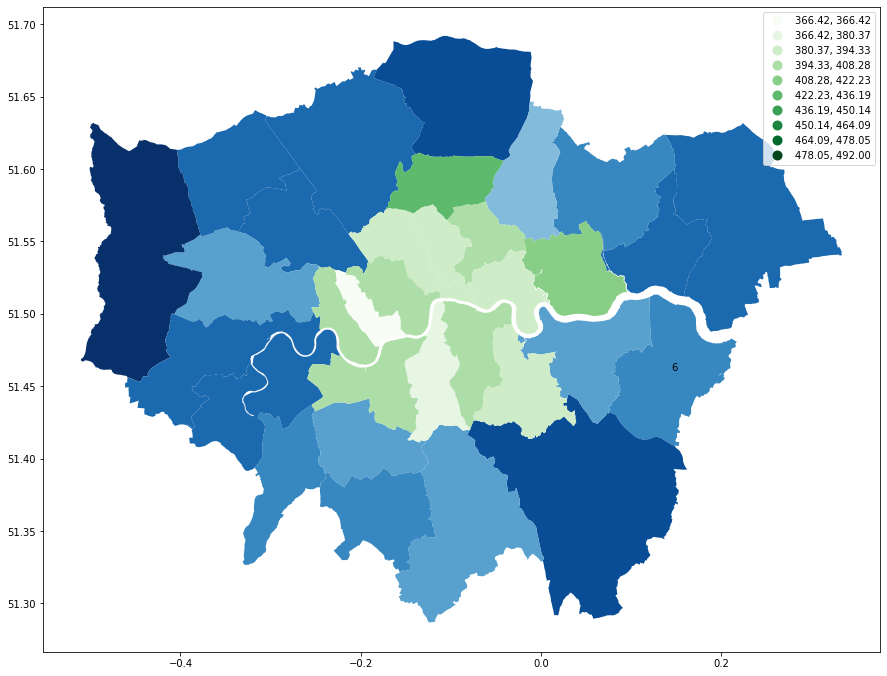

In [112]:
f, ax = plt.subplots(1, figsize=(15, 15))
ax = outerldn_merge.plot(column='mean', cmap='Blues' ,ax=ax, scheme="User_Defined", 
         legend=True, classification_kwds=dict(bins=np.linspace(minmean,maxmean,10)))
ax = innerldn_merge.plot(column='mean', cmap='Greens' ,ax=ax, scheme="User_Defined", 
         legend=True, classification_kwds=dict(bins=np.linspace(minmean,maxmean,10)))
plt.annotate(6, xy=coords)
plt.show()

In [11]:
def plot_state_choropleth_map(data_frame, locations, geojson, color, tit, color_continuous_scale='Reds',height=500,width=600):
    fig = px.choropleth(data_frame=data_frame, locations=locations, geojson=geojson, color=color, color_continuous_scale=color_continuous_scale, scope="south america")
    fig.update_layout(height=height, width=width,
                  title=tit,
                  geo=dict(lonaxis = dict(range= [-33.0, -80.0]),lataxis = dict(range= [5.0, -35.0])))
    fig.show()

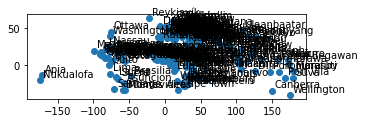

In [87]:
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

ax = cities.plot(figsize = (5,100))

for x, y, label in zip(cities.geometry.x, cities.geometry.y, cities.name):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

In [92]:
type(outerldn_merge.geometry[14])

shapely.geometry.multipolygon.MultiPolygon

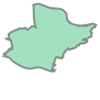

In [106]:
outerldn_merge.geometry[16]

In [107]:
coords = (outerldn_merge.geometry[16]).representative_point().coords[:][0]
coords

(0.1443823052697386, 51.4608859785046)

In [238]:
innerldn_merge

,mean,id,name,code,area_hectares,inner_statistical,geometry,coords
0,388.33,26,camden,E09000007,2178.932,True,"MULTIPOLYGON (((-0.14242 51.56912, -0.14250 51...","(-0.1625039141125169, 51.54282702817975)"
1,388.92,33,city of london,E09000001,314.942,True,"MULTIPOLYGON (((-0.11157 51.51075, -0.11159 51...","(-0.09360311229207938, 51.51557704901175)"
2,395.83,29,hackney,E09000012,1904.902,True,"MULTIPOLYGON (((-0.09766 51.57365, -0.09756 51...","(-0.04766674837702632, 51.548812259979044)"
3,395.67,23,hammersmith and fulham,E09000013,1715.409,True,"MULTIPOLYGON (((-0.24456 51.48870, -0.24460 51...","(-0.23084385323050718, 51.4987092317037)"
4,428.33,30,haringey,E09000014,2959.837,True,"MULTIPOLYGON (((-0.09766 51.57365, -0.09780 51...","(-0.1054100596040824, 51.587929820827696)"
5,384.67,28,islington,E09000019,1485.664,True,"MULTIPOLYGON (((-0.13839 51.55686, -0.13852 51...","(-0.10169366396616325, 51.54715629908195)"
6,366.42,24,kensington and chelsea,E09000020,1238.379,True,"MULTIPOLYGON (((-0.18388 51.47742, -0.18403 51...","(-0.20082849730808067, 51.50383515782215)"
7,378.33,11,lambeth,E09000022,2724.940,True,"MULTIPOLYGON (((-0.12846 51.48505, -0.12843 51...","(-0.12167604682489634, 51.45979924301275)"
8,392.33,13,lewisham,E09000023,3531.706,True,"MULTIPOLYGON (((-0.03241 51.49306, -0.03240 51...","(-0.01251054258426166, 51.453431601553305)"
9,416.58,31,newham,E09000025,3857.806,True,"MULTIPOLYGON (((-0.00786 51.52301, -0.00811 51...","(0.02780821410043185, 51.531166439651)"


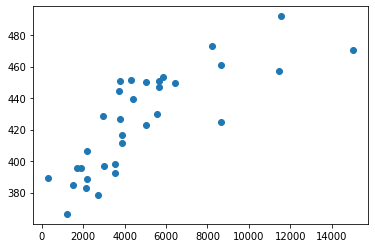

In [248]:
plt.scatter(x=merged_df.area_hectares, y=merged_df['mean'])

In [256]:
merged_df.head()

,id,name,code,area_hectares,inner_statistical,geometry,mean,coords,color
0,1,kingston upon thames,E09000021,3726.117,False,"MULTIPOLYGON (((-0.33068 51.32901, -0.33059 51...",444.75,"(-0.27698717441709947, 51.38177619516305)",red
1,2,croydon,E09000008,8649.441,False,"MULTIPOLYGON (((-0.06402 51.31864, -0.06408 51...",424.58,"(-0.06431443254760075, 51.3550591151213)",red
2,3,bromley,E09000006,15013.487,False,"MULTIPOLYGON (((0.01213 51.29960, 0.01196 51.2...",470.75,"(0.06169242705122538, 51.36686407129575)",red
3,4,hounslow,E09000018,5658.541,False,"MULTIPOLYGON (((-0.24456 51.48870, -0.24468 51...",450.92,"(-0.37987073982708675, 51.461883535326905)",red
4,5,ealing,E09000009,5554.428,False,"MULTIPOLYGON (((-0.41183 51.53408, -0.41188 51...",430.00,"(-0.31431184969039, 51.5250711051594)",red
